# Nonlinear Modeling for Covid-19

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data
Please refers to [Documentations for the API]( https://coronavirus.data.gov.uk/details/developers-guide#params-filters) if you ever need to set up **structure** or **filter**. Go to matrix for a full list of matrix and structures if you want. 

In [3]:
pip install uk-covid19

Note: you may need to restart the kernel to use updated packages.


In [29]:
from uk_covid19 import Cov19API
england_only = [
    'areaType=nation',
    'areaName=England'
]
cases_and_deaths = {
    "date": "date",
    "cumCase" : "cumCasesBySpecimenDate",
    "cumDeath": "cumDeaths28DaysByDeathDate"
}
api = Cov19API(filters=england_only, structure=cases_and_deaths)
df = api.get_dataframe()
df["date"] = pd.to_datetime(df["date"])

In [30]:
#split data
filter1 = (df["date"] >= "2020-02-01") &(df["date"] <= "2020-07-1")
filter2 = (df["date"] >= "2020-08-15") &(df["date"] <= "2020-11-15")
df1 = df[filter1]
df2 = df[filter2]

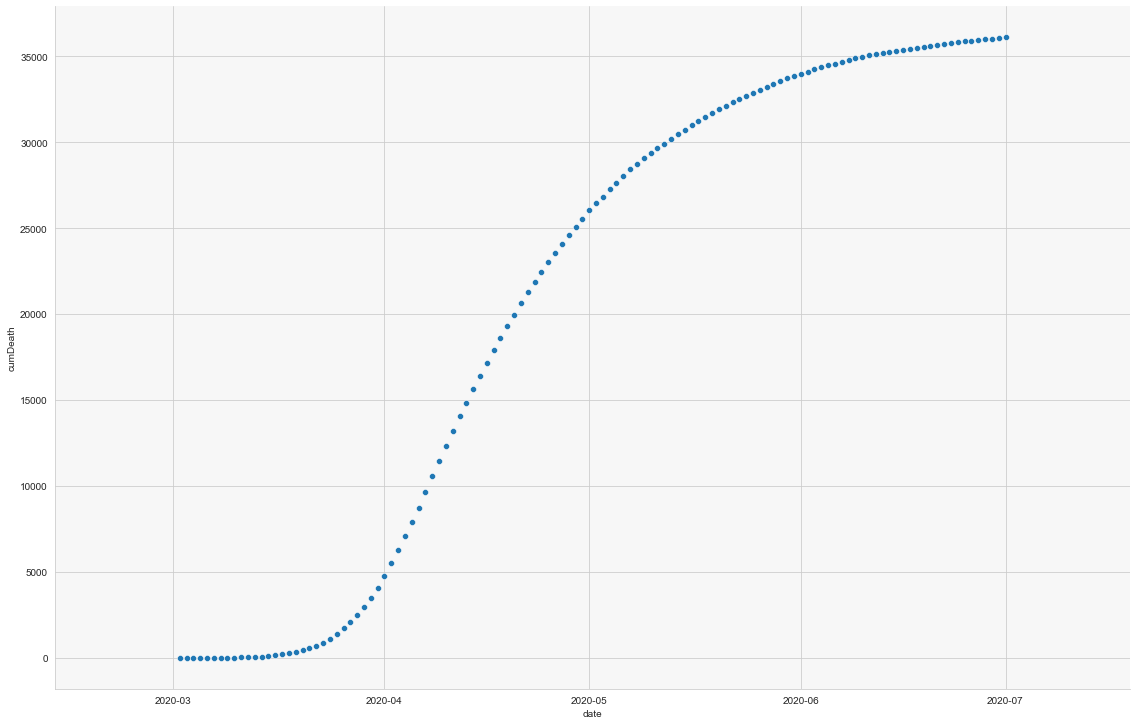

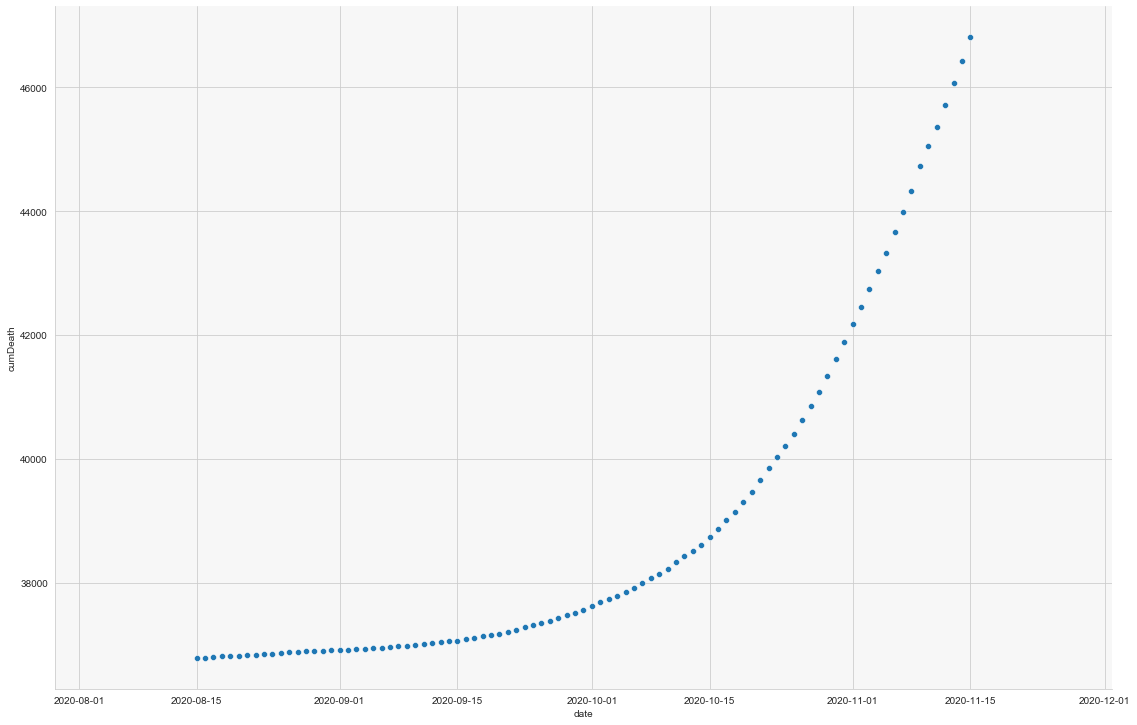

In [46]:
sns.set_style("whitegrid",{"axes.facecolor": "0.97"})
sns.relplot(data = df1, height = 10,aspect=13/8.27,x = "date", y = "cumDeath")
sns.relplot(data = df2, height = 10,aspect=13/8.27,x = "date", y = "cumDeath")

Above are how many people in England have died 😵 from covi-19 in two different time period ( ***y*** is **accumulative** death from covid-19). This first one during lockdown. The second when restrictions were lifted.

### Quest
Connect the dots above and do two pair of nonlinear regression for `df1` and `df2`. Then estimate and compare paramters. 

Sigmoid Parameters:
* b = slope
* c = lower asymptot
* d = upper asymptot
* e = inflection point

source:[*Sigmoid function*](https://www.statforbiology.com/nonlinearregression/usefulequations#sygmoidal_curves)

Questions:
* How do you make sure if the model is appropriate?
* If you use two different model, how do you compare their parameters? 

Typically, [*Sigmoid function*](https://www.statforbiology.com/nonlinearregression/usefulequations#sygmoidal_curves) are used to model population growth (S curve). The second might be easily modeled using a expotencial function but since biology suggest biology growth is an S curve. 

* Would it be possible to estimate *upper asymptot* (*d*) for `df2`? 
* If not can you use the gross population to set up an upper limit, and estimate *b* value?